# Decision Tree Classifier

In [2]:
# adding the project root inside the python path
import sys
import os

sys.path.insert(0, os.path.abspath('..'))

In [3]:
# The path where the dataset are stored
DATASET_PATH: str = "../../dataset/first_disease_sel/"
DISEASE_COLNAME: str = 'DISEASE'

## Executing the pipeline

In [4]:
from analysis.preprocess import PreprocessPipeline

pipeline = PreprocessPipeline(
    datasets_path=DATASET_PATH,
    disease_col_name=DISEASE_COLNAME
)
pipeline.execute_pipeline()

INFO:root:Pipeline already executed, found dataset inside /tmp/chl
INFO:root:Splitting dataset
INFO:root:Pipeline executed


# Building the Decision Tree Model

## Grid Search

In [5]:
from analysis.classifiers.dt import build_parameters

hyper_params = build_parameters(
    train_x=pipeline.train_x,
    train_y=pipeline.train_y,
)

INFO:root:Executing Grid Search for Decision Tree
/home/federicosilvestri/Projects/Vedrai/chl-project/.venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
480 fits failed out of a total of 2400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
480 fits failed with the following error:
Traceback (most recent call last):
  File "/home/federicosilvestri/Projects/Vedrai/chl-project/.venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/federicosilvestri/Projects/Vedrai/chl-project/.venv/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 969, in fit
    super().fit(
  File "/home/f

INFO:root:Report of GridSearch
INFO:root:     rank_test_accuracy  mean_test_accuracy  mean_train_accuracy  \
377                   1            0.742316             0.911367   
394                   2            0.739153             0.919749   
386                   3            0.729209             0.921409   
192                   4            0.726045             0.969899   
204                   5            0.725989             0.938128   
..                  ...                 ...                  ...   
175                 476                 NaN                  NaN   
240                 477                 NaN                  NaN   
241                 478                 NaN                  NaN   
408                 479                 NaN                  NaN   
0                   480                 NaN                  NaN   

     std_test_accuracy  std_train_accuracy  mean_fit_time  \
377           0.040042            0.008975       0.045125   
394           0.0357

## Building the model

In [6]:
from analysis.classifiers.dt import build_model

decision_tree = build_model(
    train_x=pipeline.train_x,
    train_y=pipeline.train_y,
    best_params=hyper_params
)
decision_tree

DecisionTreeClassifier(criterion='log_loss', max_features='sqrt',
                       min_samples_leaf=3, min_samples_split=6,
                       splitter='random')

## Evaluating the model

In [7]:
from analysis.classifiers.dt import evaluate_model

In [8]:
evaluation = evaluate_model(
    decision_tree=decision_tree,
    test_x=pipeline.test_x,
    test_y=pipeline.test_y
)
print(evaluation)

              precision    recall  f1-score   support

         A1A       1.00      0.91      0.95        32
     DIABETE       0.74      0.66      0.70        44
          GS       0.60      0.86      0.71         7
         MCM       0.42      0.71      0.53         7
        NALD       0.20      0.20      0.20        10

    accuracy                           0.71       100
   macro avg       0.59      0.67      0.62       100
weighted avg       0.74      0.71      0.72       100



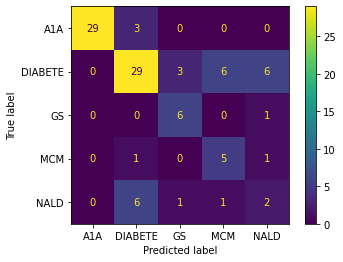

In [9]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(decision_tree, pipeline.test_x, pipeline.test_y)